# Ojective
To classify a given new review using support vector machines along with **RBF-Kernel** technqiue.

In this assignment I used SGDclassifier with hinge loss in order to find the best vectorization and compared it with **RBF-Kernel**

# Loading libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Reading data

In [0]:
df=pd.read_csv("yesterday/data.csv")
print(df.shape)
df.columns

(100000, 12)


Index(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'Class'],
      dtype='object')

# Train and test dataset
Dataset is diveided into two parts in which 67% data is train data and 33% of the data is test data which is used to validate the performance of the dataset

In [0]:
from sklearn.model_selection import train_test_split
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df['Text'],df['Class'],test_size=0.33,shuffle=False)
print(df_train_x.shape,df_test_x.shape,df_train_y.shape,df_test_y.shape)

(67000,) (33000,) (67000,) (33000,)


# Data standardization function

In [0]:
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
from sklearn import warnings
warnings.filterwarnings("ignore", category=DataConversionWarning)
def data_standardization(train_data,test_data):
    std=StandardScaler(with_mean=False)
    std=std.fit(train_data)
    train_data = train_data.astype(float)
    test_data = test_data.astype(float)
    train=std.transform(train_data)
    test=std.transform(test_data)
    print(train.shape,test.shape)
    return train,test

# Hyperparameter tuning -Grid search

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
#loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False, n_iter=None
#
#
def grid_search(BOW1_train_std,df_train_y,filename):
    #filename="/content/drive/My Drive/Colab_Notebooks/SVM/"+filename
    parameters = {'alpha': [ 0.001,0.01, 0.1, 1, 10, 100, 1000],'penalty':['l2', 'l1','elasticnet']}
    #svm=SVC(tol=0.01,kernel='rbf',verbose=10)
    svm=SGDClassifier(loss='hinge', penalty='l2', tol=0.01, verbose=0, epsilon=0.1, n_jobs=-1)
    cv=GridSearchCV(svm,parameters,cv=3,scoring='f1')
    best_model=cv.fit(BOW1_train_std,df_train_y)
    x=pd.DataFrame(best_model.cv_results_)
    x.to_csv(filename)

# Hyperparameter tuning -Random search function 

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
def random_search(BOW1_train_std,df_train_y,filename):
   # filename="/content/drive/My Drive/Colab_Notebooks/SVM/"+filename
    param_distributions={'alpha':np.logspace(-1,4,50),'penalty':['l2', 'l1','elasticnet']}
    svm=SGDClassifier(loss='hinge', penalty='l2', tol=0.01, verbose=0, epsilon=0.1, n_jobs=-1)
    cv1=RandomizedSearchCV(svm,param_distributions,cv=3,scoring='f1')
    best_model1=cv1.fit(BOW1_train_std,df_train_y)
    x=pd.DataFrame(best_model1.cv_results_)
    x.to_csv(filename)

# draw random and grid search reulsts

In [0]:
import ast
from IPython.display import display, HTML
def read_table_data(filename):
    #filename="/content/drive/My Drive/Colab_Notebooks/SVM/"+filename
    x=pd.read_csv(filename)
    alpha_value=[]
    regularization=[]
    cv_score=[]
    for x1 in x[['params','mean_test_score']].values:
        #print(x1)
        a=ast.literal_eval(x1[0])
        cv_score.append(x1[1])
        alpha_value.append(a['alpha'])
        regularization.append(a['penalty'])
    results=pd.DataFrame({'alpha_value':alpha_value,'regularization':regularization,'cv_score':cv_score})
    zz=results.sort_values(by=['cv_score','regularization'],ascending=False)
    display(zz)

# Plot confusion matrix

In [0]:
def plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,nrows=3,ncols=2):
    fig, ax = plt.subplots(figsize=(20,15),nrows=nrows, ncols=ncols)
    i=0
    for row in ax:
        for col in row:
            sb.heatmap(dfs[i], annot=True, fmt='g',ax=col)
            col.title.set_text('L2-regularizatiton with C='+str(C_values[i]))
            col.set_xlabel('Predicted label')
            col.set_ylabel('True label')
            i+=1

    pre_scores=[]
    re_scores=[]
    accuracy_scores=[]
    f2_scores=[]
    non_zero_ws=[]
    sparsity=[]
    for i in range(nrows*ncols):
        pre_scores.append(precision_score(df_test_y,outputs[i]))
        re_scores.append(recall_score(df_test_y,outputs[i]))
        accuracy_scores.append(accuracy_score(df_test_y,outputs[i]))
        f2_scores.append(f1_score(df_test_y,outputs[i]))
    non_zero_ws.append(np.count_nonzero(lr_1.coef_))
    non_zero_ws.append(np.count_nonzero(lr_2.coef_))
    non_zero_ws.append(np.count_nonzero(lr_3.coef_))
    non_zero_ws.append(np.count_nonzero(lr_4.coef_))
    non_zero_ws.append(np.count_nonzero(lr_5.coef_))
    non_zero_ws.append(np.count_nonzero(lr_6.coef_))
    sparsity.append(np.count_nonzero(lr_1.coef_)/ len(lr_1.coef_[0]))
    sparsity.append(np.count_nonzero(lr_2.coef_)/ len(lr_2.coef_[0]))
    sparsity.append(np.count_nonzero(lr_3.coef_)/ len(lr_3.coef_[0]))
    sparsity.append(np.count_nonzero(lr_4.coef_)/ len(lr_4.coef_[0]))
    sparsity.append(np.count_nonzero(lr_5.coef_)/ len(lr_5.coef_[0]))
    sparsity.append(np.count_nonzero(lr_6.coef_)/ len(lr_6.coef_[0]))
    from beautifultable import BeautifulTable
    table=BeautifulTable()
    table.insert_column(0,"precision",pre_scores)
    table.insert_column(1,"recall",re_scores)
    table.insert_column(2,"accuracy",accuracy_scores)
    table.insert_column(3,"f1-score",f2_scores)
    table.insert_column(4,"Non-zero",non_zero_ws)
    table.insert_column(5,"sparsity(Non-zero weights)",sparsity)
    table.insert_column(6,"C",C_values)
    sorted_table=table.sort('C')
    print(table) 

In [0]:
# Classification with SGDClassifier and hinge loss :

# Bag of words


In this assignment I used SGDclassifier with hinge loss in order to find the best vectorization and compared it with **RBF-Kernel**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
bow_unigrams=CountVectorizer(stop_words='english')
BOW1_train=bow_unigrams.fit(df_train_x)
BOW1_train=bow_unigrams.transform(df_train_x)
BOW1_test=bow_unigrams.transform(df_test_x)
print("The train data shape is ",BOW1_train.shape,"and test data shape is ",BOW1_test.shape)

The train data shape is  (67000, 90770) and test data shape is  (33000, 90770)


In [0]:
train_data,test_data=data_standardization(BOW1_train,BOW1_test)

(67000, 90770) (33000, 90770)


In [0]:
print(test_data.shape)

(33000, 90770)


In [0]:
#Label encoder from positive negative to 1,0
from sklearn import preprocessing
bin=preprocessing.LabelEncoder()
df_train_y=bin.fit_transform(df_train_y)
df_test_y=bin.fit_transform(df_test_y)

In [0]:
from sklearn import warnings
grid_search(train_data,df_train_y,'unigrams_result_grid.csv') #performed grid search
random_search(train_data,df_train_y,'bow_uni_random.csv') # performed random search

In [0]:
print("*********** Results of Grid search ***********")
read_table_data('unigrams_result_grid.csv')
print("*********** Results of Random search ***********")
read_table_data('bow_uni_random.csv')

*********** Results of Grid search ***********


,alpha_value,cv_score,regularization
5,0.010,0.952189,elasticnet
9,1.000,0.948840,l2
6,0.100,0.948629,l2
8,0.100,0.946700,elasticnet
12,10.000,0.943004,l2
15,100.000,0.942826,l2
18,1000.000,0.942826,l2
13,10.000,0.942826,l1
16,100.000,0.942826,l1
19,1000.000,0.942826,l1


*********** Results of Random search ***********


,alpha_value,cv_score,regularization
9,0.517947,0.950113,l2
0,596.362332,0.942826,l2
7,232.995181,0.942826,l1
1,10000.000000,0.942826,elasticnet
2,35.564803,0.942826,elasticnet
6,13.894955,0.942826,elasticnet
5,0.828643,0.942172,l1
4,0.409492,0.939168,l1
3,0.202359,0.938509,l1
8,22.229965,0.628543,elasticnet


The best results for  L1 and L2 and elastic_net reguarization are found at :

For elastic_net -> cv score is around 0.951 and alpha=0.01 and 0.1 and 1, 10

For L2 - > cv_score is around 0.949 and C=1, 0.10 , 10 ,100

For L1 - > cv_score is 0.942863 and C=10, 100,3.39,1000

so lets try the test data validation on this parameters

# L2-regularization with Bag of words unigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='l2',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='l2',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='l2',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='l2',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='l2',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.923  | 0.927  |  0.869   |  0.925   |  36644   |       0.404       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.918  | 0.974  |  0.901   |  0.945   |  41871   |       0.461       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.897  | 0.992  |  0.894   |  0.942   |  46811   |       0.516       |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |  58950   |       0.649       |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

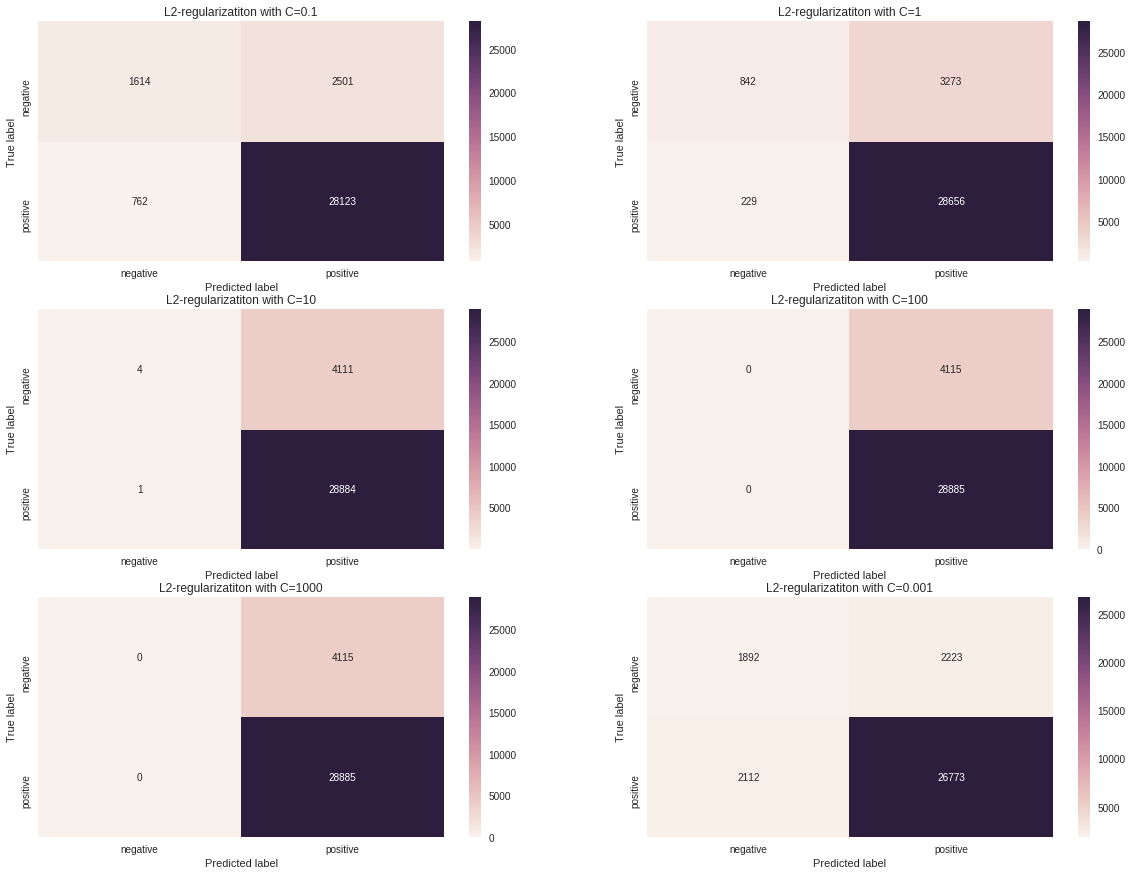

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

**Observation:
As the value of C increasing  is error also increasing we can see that in above table ,precision score is decreasing **

# L1-regularization with Bag of words unigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='l1',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='l1',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='l1',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='l1',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='l1',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l1',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.928  | 0.924  |  0.871   |  0.926   |  15736   |       0.173       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.876  | 0.992  |   0.87   |   0.93   |    99    |       0.001       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    14    |        0.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    13    |        0.0        |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.0   |  0.0   |  0.125  

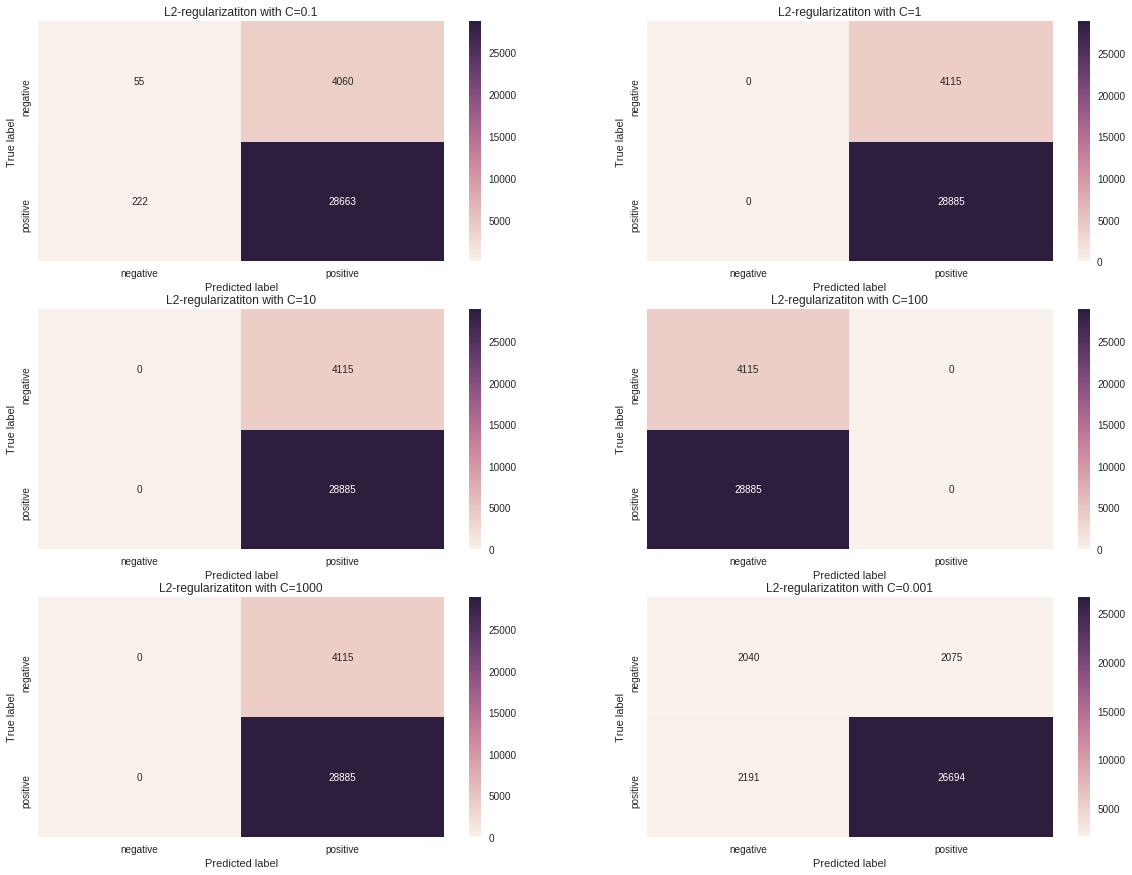

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

# observations
**1.As the C values increasing the error also increasing which we can observe from precision score <br>2.As the C value increasing sparsity also increasing that we can obsserve from the table**

# Elastic net with bag of words unigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.929  | 0.933  |  0.879   |  0.931   |  21031   |       0.232       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.888  | 0.998  |  0.888   |   0.94   |   132    |       0.001       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    17    |        0.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    0     |        0.0        |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

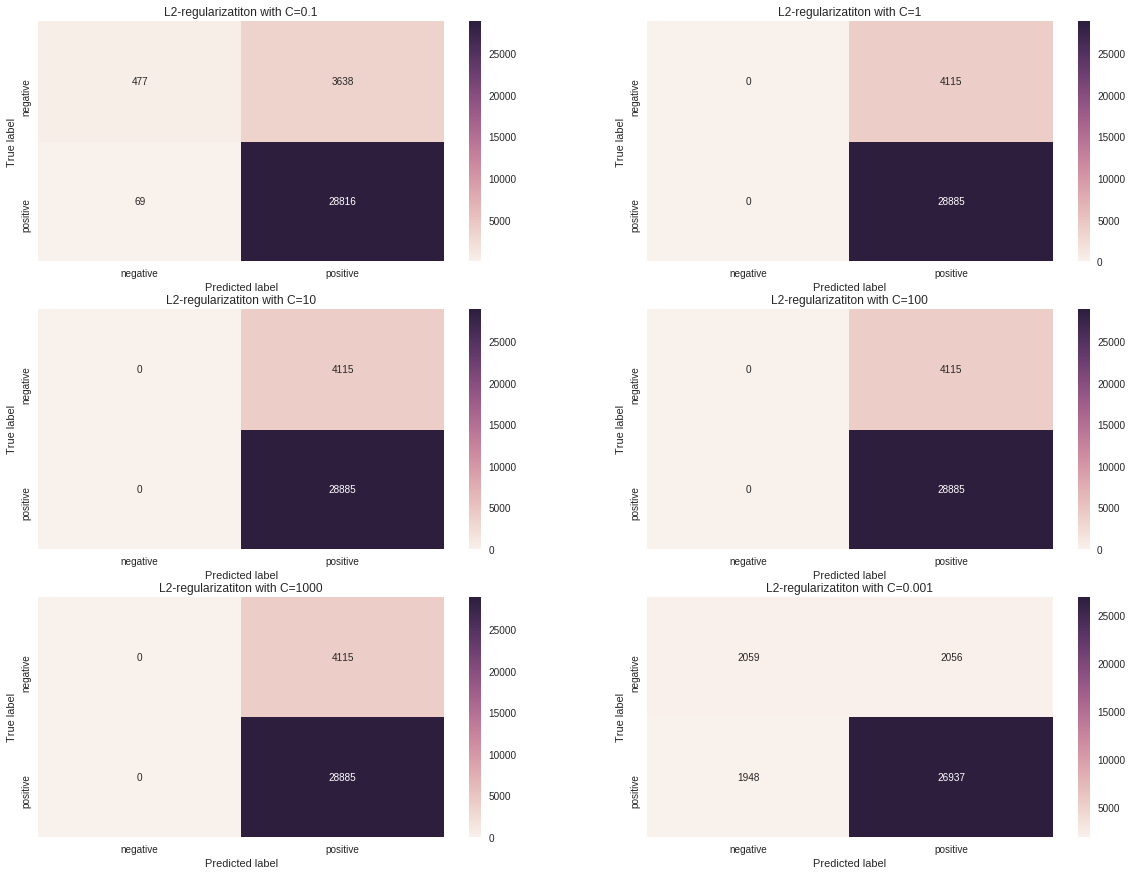

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

#Bag of words Bigrams




In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
bow_unigrams=CountVectorizer(ngram_range=(1,2),stop_words='english')
BOW2_train=bow_unigrams.fit(df_train_x)
BOW2_train=bow_unigrams.transform(df_train_x)
BOW2_test=bow_unigrams.transform(df_test_x)
print("The train data shape is ",BOW2_train.shape,"and test data shape is ",BOW2_test.shape)

The train data shape is  (67000, 1169770) and test data shape is  (33000, 1169770)


In [0]:
train_data,test_data=data_standardization(BOW2_train,BOW2_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(67000, 1169770) (33000, 1169770)


In [0]:
grid_search(train_data,df_train_y,'bigrams_grid.csv') #performed grid search
random_search(train_data,df_train_y,'bigrams_random.csv') # performed random search

In [0]:
print("*********** Results of Grid search ***********")
read_table_data('bigrams_grid.csv')
print("*********** Results of Random search ***********")
read_table_data('bigrams_random.csv')

*********** Results of Grid search ***********


,alpha_value,cv_score,regularization
5,0.010,0.950624,elasticnet
9,1.000,0.947054,l2
8,0.100,0.946470,elasticnet
12,10.000,0.943897,l2
15,100.000,0.942870,l2
18,1000.000,0.942833,l2
13,10.000,0.942826,l1
11,1.000,0.942826,elasticnet
14,10.000,0.942826,elasticnet
17,100.000,0.942826,elasticnet


*********** Results of Random search ***********


,alpha_value,cv_score,regularization
9,1526.417967,0.942833,l2
6,8.685114,0.942826,l1
3,0.828643,0.942826,elasticnet
4,596.362332,0.942826,elasticnet
5,28.117687,0.942826,elasticnet
8,7906.043211,0.942826,elasticnet
0,0.126486,0.941774,l2
1,232.995181,0.628565,elasticnet
2,44.984327,0.628565,elasticnet
7,35.564803,0.628543,l1


The best results for  L1 and L2 and elastic_net reguarization are found at :

For elastic_net -> cv score is around 0.95 and alpha=0.01 and 0.1 and 1

For L2 - > cv_score is around 0.945 and C=1, 0.10 ,,100

For L1 - > cv_score is 0.942863 and C=0.1,1,10 

so lets try the test data validation on this parameters

# L2-regularization with Bag of words Bigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='l2',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='l2',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='l2',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='l2',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='l2',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.92  |  0.9   |  0.844   |   0.91   |  324683  |       0.278       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.917  | 0.939  |  0.873   |  0.928   |  376198  |       0.322       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.889  | 0.995  |  0.887   |  0.939   |  520582  |       0.445       |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.881  | 0.999  |  0.881   |  0.936   |  815473  |       0.697       |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

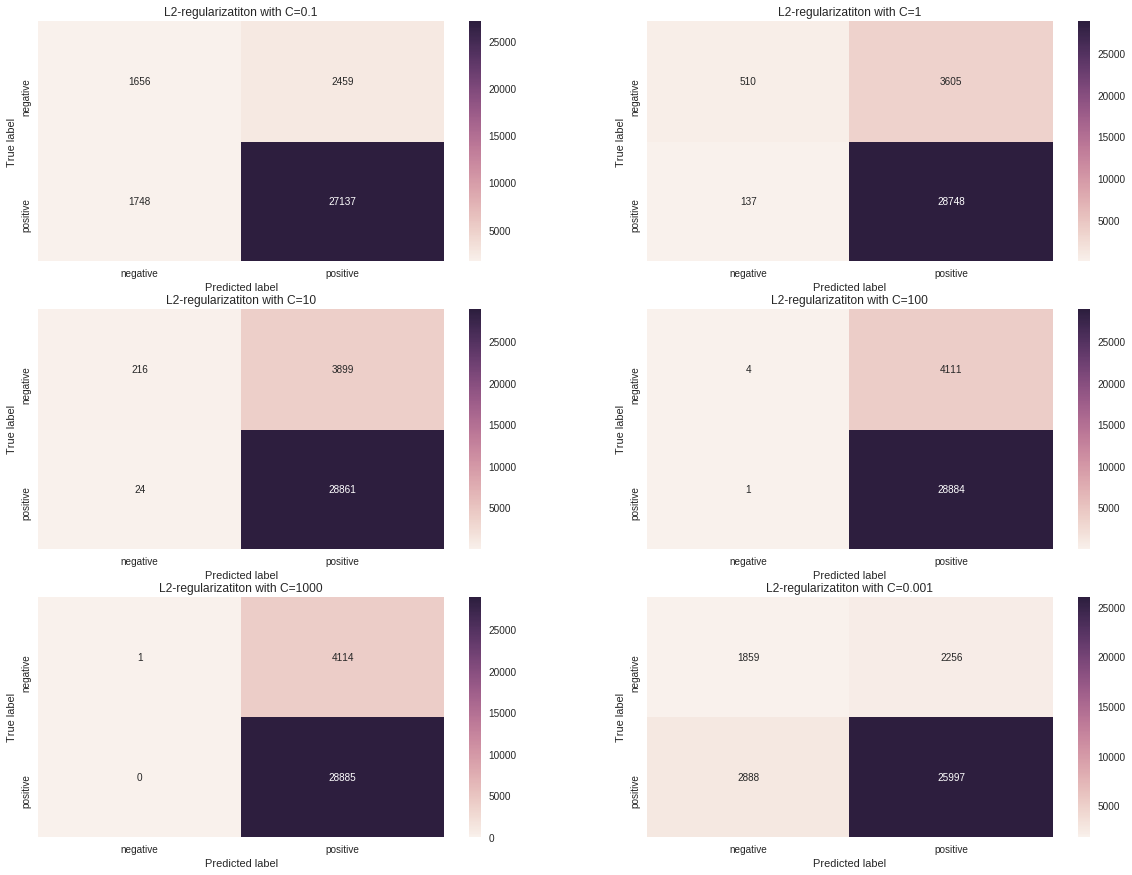

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

**Observation:
As the value of C increasing  is error also increasing we can see that in above table ,precision score is decreasing **

# L1-regularization with Bag of words unigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='l1',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='l1',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='l1',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='l1',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='l1',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l1',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.914  | 0.897  |  0.836   |  0.906   |  169910  |       0.145       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.876  | 0.985  |  0.864   |  0.927   |   1206   |       0.001       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  | 0.996  |  0.872   |  0.932   |   140    |        0.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    16    |        0.0        |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.0   |  0.0   |  0.125  

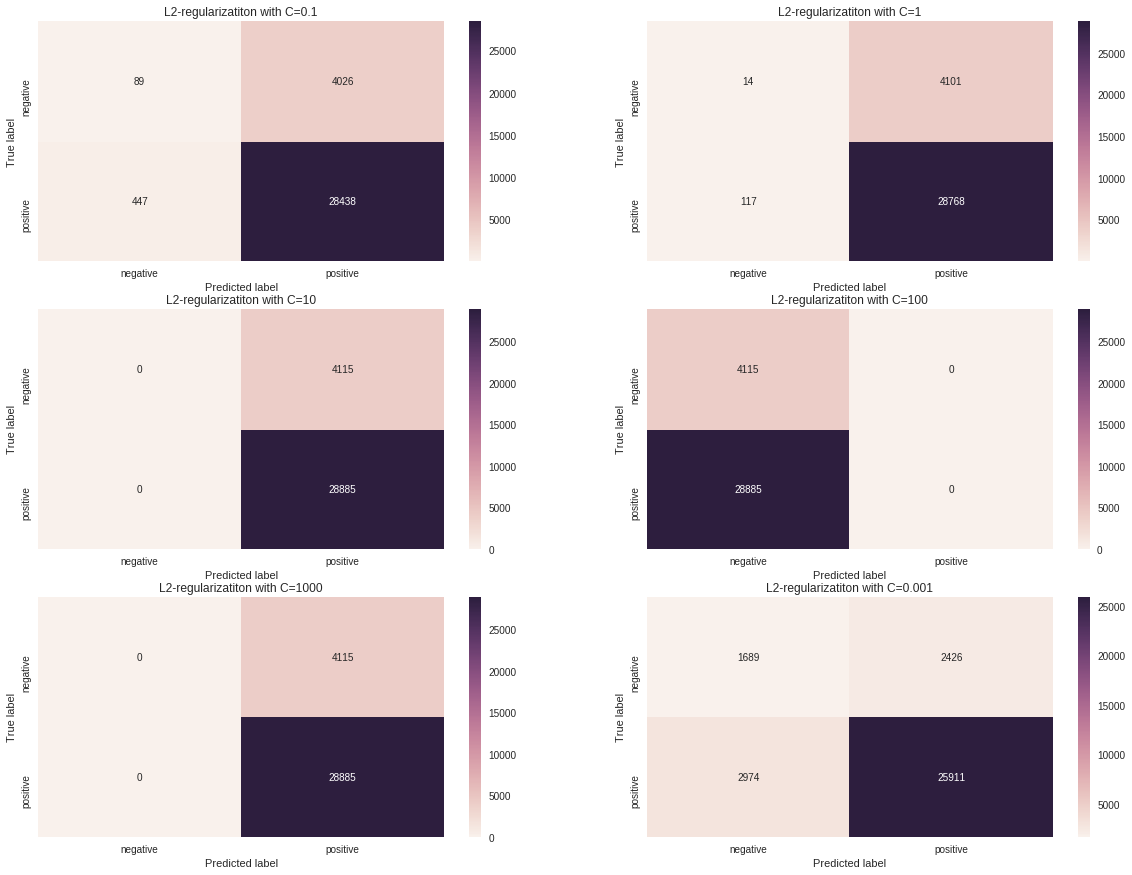

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

# observations
1. As the c value increasing the error also increasing which we can observe from the table
2. As the c increasing the sparsitty also increasing which we can observe from the above table

# Elastic net with bag of words unigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.924  |  0.89  |   0.84   |  0.907   |  270600  |       0.231       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.886  | 0.998  |  0.886   |  0.939   |   116    |        0.0        |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    12    |        0.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    0     |        0.0        |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

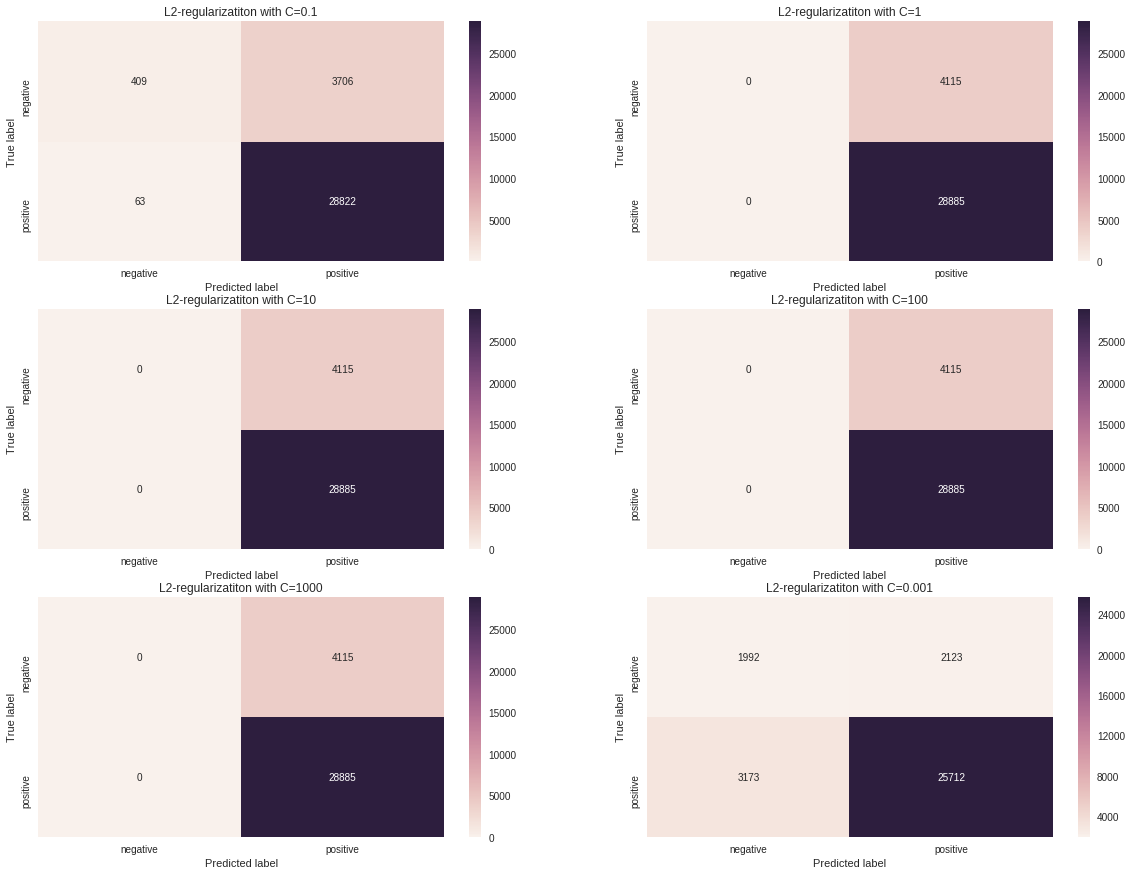

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

**As the value of alpha increasing the sparsity in the dataset is increasing that we can observe from the above table**

# tf_idf - Unigrams

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow_unigrams=TfidfVectorizer(stop_words='english')
tfidf1_train=bow_unigrams.fit(df_train_x)
tfidf1_train=bow_unigrams.transform(df_train_x)
tfidf1_test=bow_unigrams.transform(df_test_x)
print("The train data shape is ",tfidf1_train.shape,"and test data shape is ",tfidf1_test.shape)

The train data shape is  (67000, 90770) and test data shape is  (33000, 90770)


In [0]:
train_data,test_data=data_standardization(tfidf1_train,tfidf1_test)

(67000, 90770) (33000, 90770)


In [0]:
grid_search(train_data,df_train_y,'tf_uni_grid.csv') #performed grid search
random_search(train_data,df_train_y,'tf_uni_random.csv') # performed random search

In [0]:
print("*********** Results of Grid search ***********")
read_table_data('tf_uni_grid.csv')
print("*********** Results of Random search ***********")
read_table_data('tf_uni_random.csv')

*********** Results of Grid search ***********


,alpha_value,regularization,cv_score
5,0.010,elasticnet,0.949922
9,1.000,l2,0.948077
8,0.100,elasticnet,0.945941
6,0.100,l2,0.944892
12,10.000,l2,0.942878
15,100.000,l2,0.942826
18,1000.000,l2,0.942826
13,10.000,l1,0.942826
16,100.000,l1,0.942826
19,1000.000,l1,0.942826


*********** Results of Random search ***********


,alpha_value,regularization,cv_score
7,4.291934,l2,0.943479
5,1206.792641,l2,0.942826
8,2442.053095,l1,0.942826
0,10.985411,elasticnet,0.942826
1,2.682696,elasticnet,0.942826
2,1.325711,elasticnet,0.942826
9,13.894955,elasticnet,0.942826
4,6250.551925,l2,0.941581
3,0.100000,l1,0.936365
6,35.564803,elasticnet,0.314261


The best results for  L1 and L2 and elastic_net reguarization are found at :

For elastic_net -> cv score is around 0.95 and alpha=0.01 and 0.1 and 1, 10

For L2 - > cv_score is around 0.948 and C=1, 0.10 , 10 ,100

For L1 - > cv_score is 0.942863 and C=1, 10,100,1000

so lets try the test data validation on this parameters

# # L2-regularization with tf-idf unigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='l2',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='l2',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='l2',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='l2',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='l2',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.918  | 0.918  |  0.856   |  0.918   |  38351   |       0.423       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.915  |  0.96  |  0.887   |  0.937   |  46928   |       0.517       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.896  | 0.988  |  0.889   |   0.94   |  57340   |       0.632       |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.876  |  1.0   |  0.875   |  0.934   |  65637   |       0.723       |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

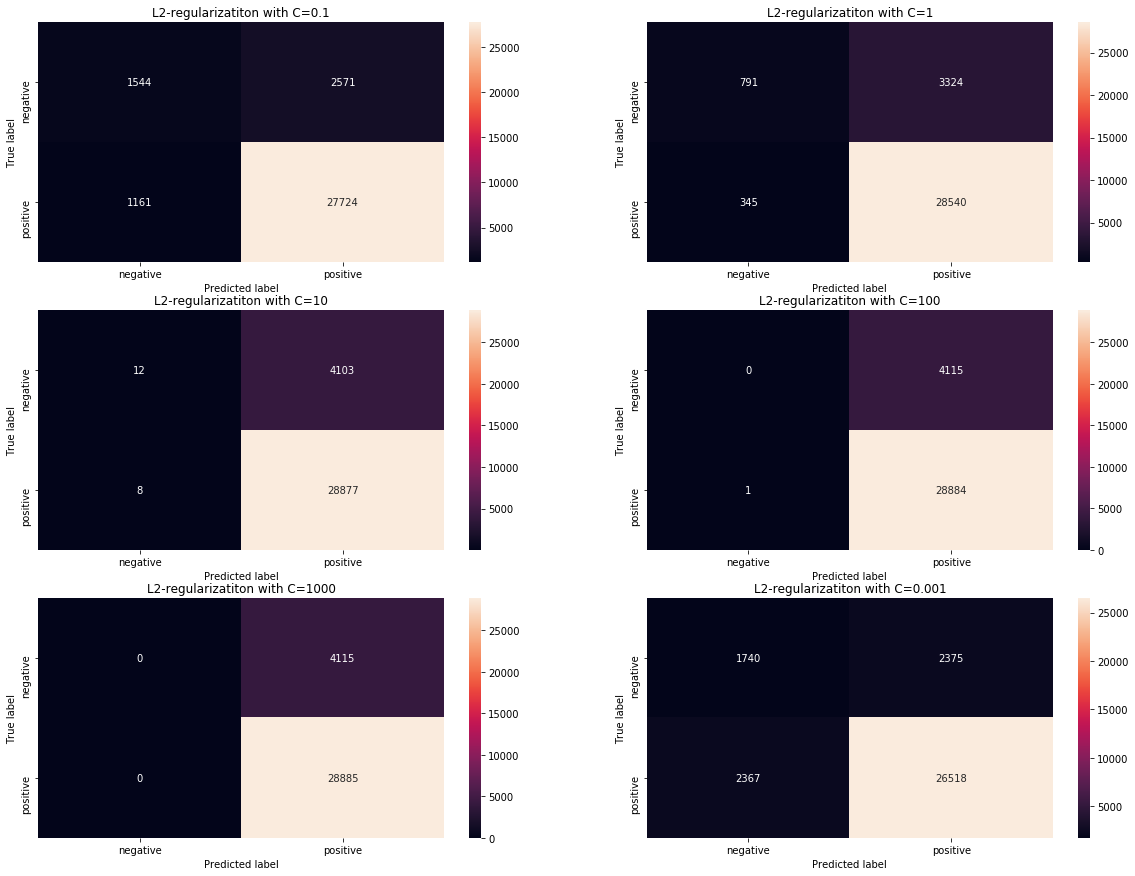

In [0]:
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

**Observation: As the value of C increasing is error also increasing we can see that in above table ,precision score is decreasing**



# L1-regularization with tf-idf unigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='l1',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='l1',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='l1',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='l1',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='l1',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l1',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.925  |  0.92  |  0.864   |  0.922   |  15795   |       0.174       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  | 0.998  |  0.874   |  0.933   |   136    |       0.001       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    17    |        0.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    3     |        0.0        |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

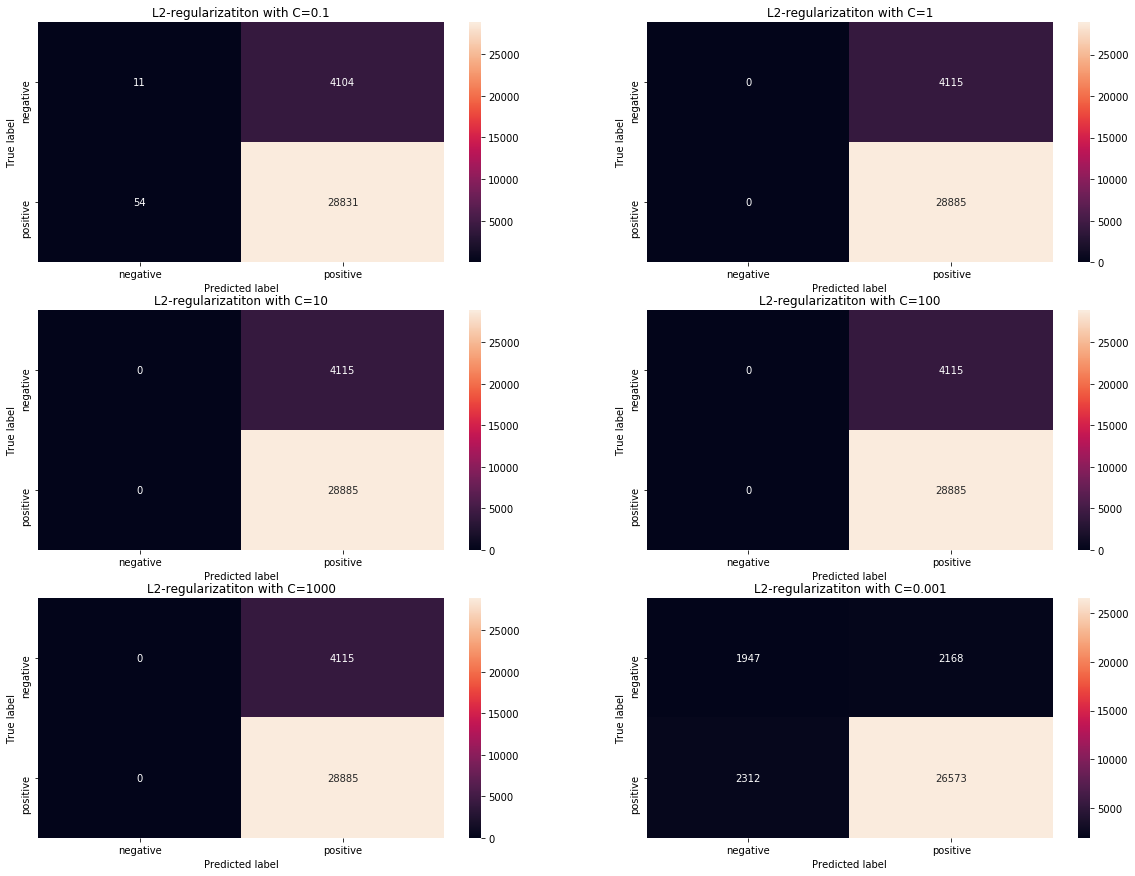

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

# Observations
1. As the C value increasing the error alos increasing 
2. As the C value increasing the sparsity in the weight vector also increasing which we can observe from the above table.

# Elastic net with tf-idf unigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.925  | 0.927  |  0.871   |  0.926   |  22200   |       0.245       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.882  | 0.999  |  0.882   |  0.937   |   201    |       0.002       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    21    |        0.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    0     |        0.0        |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

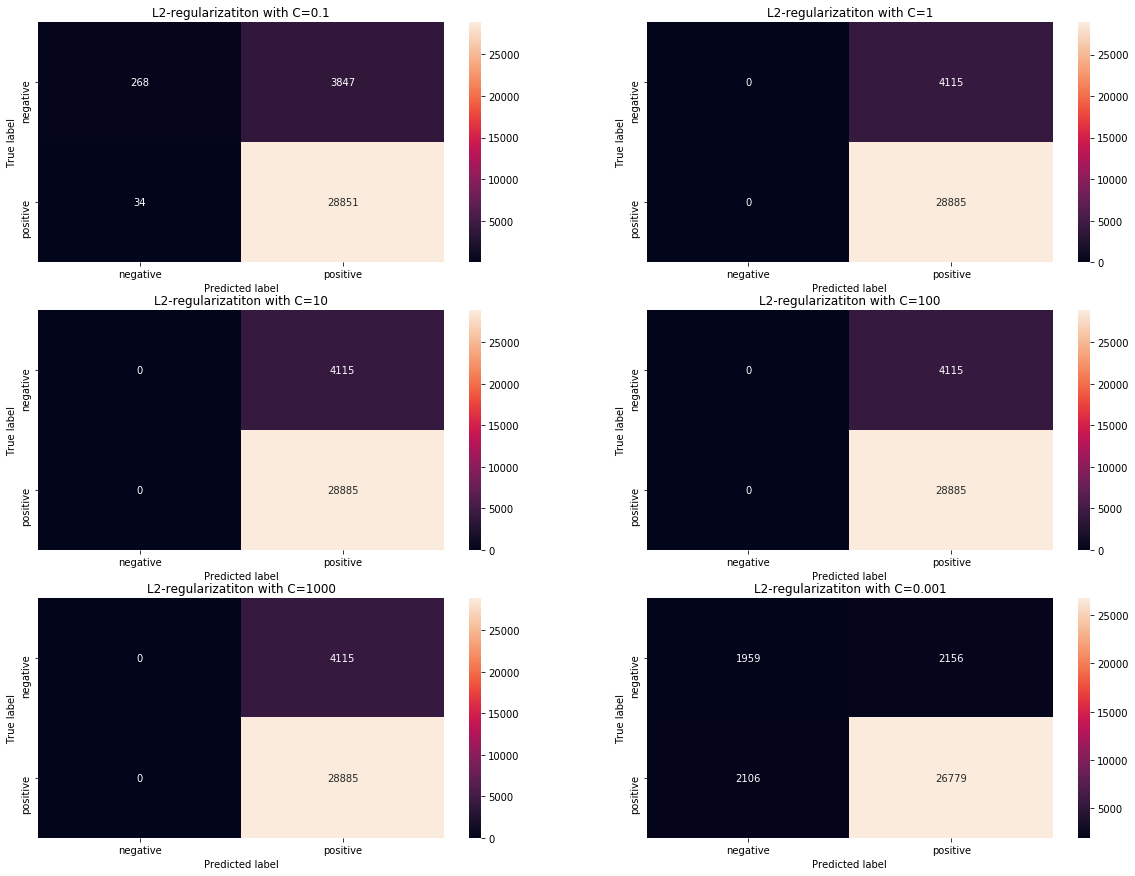

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

In [0]:
# tf-idf bigrams vectorization

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow_unigrams=TfidfVectorizer(ngram_range=(1,2),stop_words='english')
tfidf2_train=bow_unigrams.fit(df_train_x)
tfidf2_train=bow_unigrams.transform(df_train_x)
tfidf2_test=bow_unigrams.transform(df_test_x)
print("The train data shape is ",tfidf2_train.shape,"and test data shape is ",tfidf2_test.shape)

The train data shape is  (67000, 1169770) and test data shape is  (33000, 1169770)


In [0]:
train_data,test_data=data_standardization(tfidf2_train,tfidf2_test)

(67000, 1169770) (33000, 1169770)


In [0]:
grid_search(train_data,df_train_y,'tf_bi_grid.csv') #performed grid search
random_search(train_data,df_train_y,'tf_bi_random.csv') # performed random search

In [0]:
print("*********** Results of Grid search ***********")
read_table_data('tf_bi_grid.csv')
print("*********** Results of Random search ***********")
read_table_data('tf_bi_random.csv')

*********** Results of Grid search ***********


,alpha_value,regularization,cv_score
5,0.010,elasticnet,0.949350
8,0.100,elasticnet,0.946117
9,1.000,l2,0.945949
6,0.100,l2,0.943510
12,10.000,l2,0.943409
15,100.000,l2,0.942832
18,1000.000,l2,0.942832
16,100.000,l1,0.942826
19,1000.000,l1,0.942826
11,1.000,elasticnet,0.942826


*********** Results of Random search ***********


,alpha_value,regularization,cv_score
1,0.517947,l2,0.948818
2,0.126486,elasticnet,0.944967
9,0.100000,l2,0.944756
4,1.676833,l2,0.944491
8,3906.939937,l2,0.942884
0,1206.792641,elasticnet,0.942826
3,8.685114,elasticnet,0.942826
5,184.206997,elasticnet,0.942826
6,6250.551925,elasticnet,0.942826
7,1526.417967,elasticnet,0.942826


The best results for L1 and L2 and elastic_net reguarization are found at :

For elastic_net -> cv score is around 0.95 and alpha=0.01 and 0.1 and 1 , 10 , 100

For L2 - > cv_score is around 0.945 and C=1, 0.10 ,10,100

For L1 - > cv_score is 0.942863 and C=100,1000,1 etc

so lets try the test data validation on this parameters

# L2-regularization with tf-idf Bigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='l2',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='l2',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='l2',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='l2',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='l2',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.917  | 0.864  |  0.813   |   0.89   |  334336  |       0.286       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.914  | 0.901  |  0.839   |  0.907   |  377473  |       0.323       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.888  | 0.989  |  0.882   |  0.936   |  518027  |       0.443       |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.88  | 0.999  |   0.88   |  0.936   |  997985  |       0.853       |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

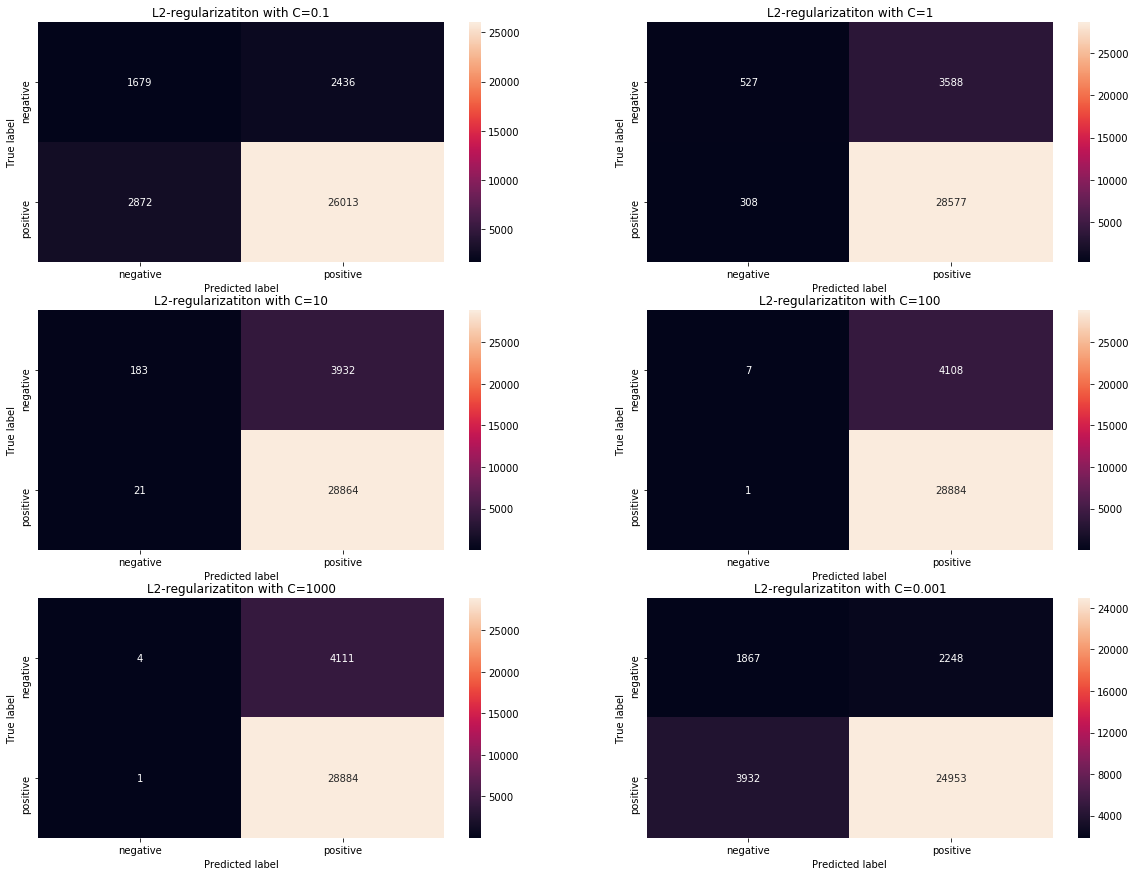

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

**Observation: As the value of C increasing is error also increasing we can see that in above table ,precision score is decreasing.**



# L1-regularization with Bag of words unigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='l1',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='l1',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='l1',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='l1',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='l1',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l1',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.913  | 0.893  |  0.832   |  0.903   |  178389  |       0.152       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.876  | 0.982  |  0.863   |  0.926   |   1273   |       0.001       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    92    |        0.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.876  | 0.996  |  0.873   |  0.932   |    31    |        0.0        |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

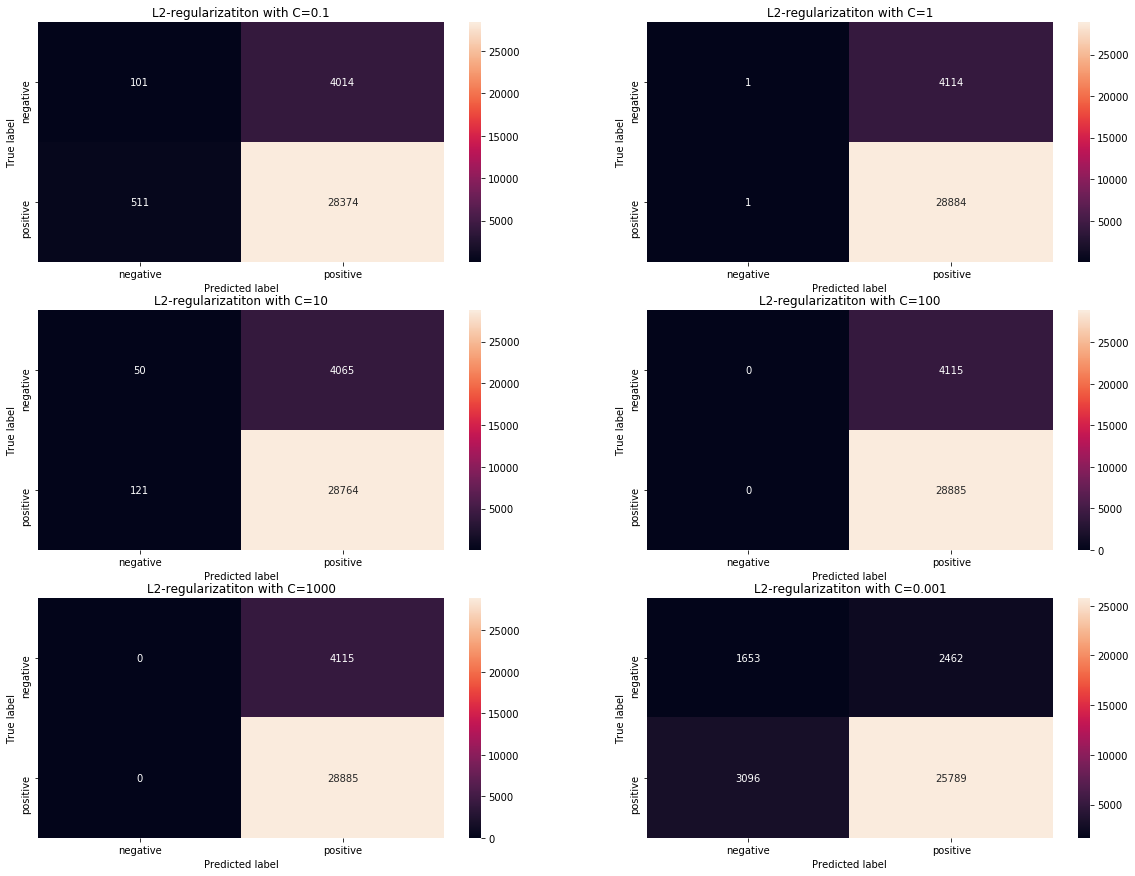

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

# Observations
1.As the C value increasing the error also increasing.
2.As the C value increasing the sparsity in the weight vector also increasing which we can observe from the above table

# word2vec model

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tf_idf_model=TfidfVectorizer(stop_words='english')
stop_words = tf_idf_model.get_stop_words()
model=[]   #df_train_x.shape,df_test_x.shape,df_train_y.shape,df_test_y.shape
for sent in df_train_x:
    temp=[]
    for word in sent.split():
        if word not in stop_words:
            temp.append(word)
    model.append(temp)
print(model[0][0:10])

['witty', 'little', 'book', 'makes', 'son', 'laugh', 'loud', 'recite', 'car', 'driving']


In [0]:
#!pip install google_compute_engine
from gensim.models import Word2Vec
amazon_model = Word2Vec(model, size=300, window=5, min_count=1, workers=4)

In [0]:
import numpy as np
word_vectors = amazon_model.wv
train_vec=[]
counter=0
for sentence in df_train_x:
    temp=np.zeros(300)
    length=0
    for word in sentence.split():
        if word in word_vectors:
            temp=temp+amazon_model.wv[word]
        else:
            #print(word," is not presnet in training model of word2vec")
            pass
        length+=1
    train_vec.append(temp/length)
    if(counter%10000==0):
        print(counter)
    counter+=1

In [0]:
import numpy as np
word_vectors = amazon_model.wv
test_vec=[]
counter=0
for sentence in df_test_x:
    temp=np.zeros(300)
    length=0
    for word in sentence.split():
        if word in word_vectors:
            temp=temp+amazon_model.wv[word]
        else:
            pass# print(word," is not presnet in training model of word2vec")
        length+=1
    test_vec.append(temp/length)
    if(counter%10000==0):
        print(counter)
    counter+=1

In [0]:
train_vec=np.array(train_vec,dtype=np.float32)
test_vec=np.array(test_vec,dtype=np.float32)

In [0]:
train_data,test_data=data_standardization(train_vec,test_vec)

(67000, 300) (33000, 300)


In [0]:
grid_search(train_data,df_train_y,'word2vec_grid.csv') #performed grid search
random_search(train_data,df_train_y,'word2vec_random.csv') # performed random search

In [0]:
print("*********** Results of Grid search ***********")
read_table_data('word2vec_grid.csv')
print("*********** Results of Random search ***********")
read_table_data('word2vec_random.csv')

*********** Results of Grid search ***********


,alpha_value,regularization,cv_score
2,0.001,elasticnet,0.946935
3,0.010,l2,0.946511
0,0.001,l2,0.945735
1,0.001,l1,0.943704
6,0.100,l2,0.942940
5,0.010,elasticnet,0.942856
9,1.000,l2,0.942826
12,10.000,l2,0.942826
15,100.000,l2,0.942826
18,1000.000,l2,0.942826


*********** Results of Random search ***********


,alpha_value,regularization,cv_score
2,0.517947,l2,0.942826
5,1526.417967,l2,0.942826
1,184.206997,l1,0.942826
8,471.486636,l1,0.942826
0,1930.697729,elasticnet,0.942826
3,3906.939937,elasticnet,0.942826
4,4941.713361,elasticnet,0.942826
7,28.117687,elasticnet,0.942826
9,0.828643,elasticnet,0.942826
6,115.139540,l1,0.628565


The best results for L1 and L2 and elastic_net reguarization are found at :

For elastic_net -> cv score is around 0.95 and alpha=0.001 and 0.01 and 0.1, 10 and etc

For L2 - > cv_score is around 0.948 and C=0.01, 0.0010 , 0.1 and etc.
For L1 - > cv_score is 0.942863 and C=0.01, 0.10,1,10,100,1000

so lets try the test data validation on this parameters

# L2-regularization with word2vec

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='l2',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='l2',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='l2',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='l2',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='l2',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.884  | 0.996  |  0.883   |  0.937   |   300    |        1.0        | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.876  |  1.0   |  0.876   |  0.934   |   300    |        1.0        |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |   300    |        1.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |   300    |        1.0        |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

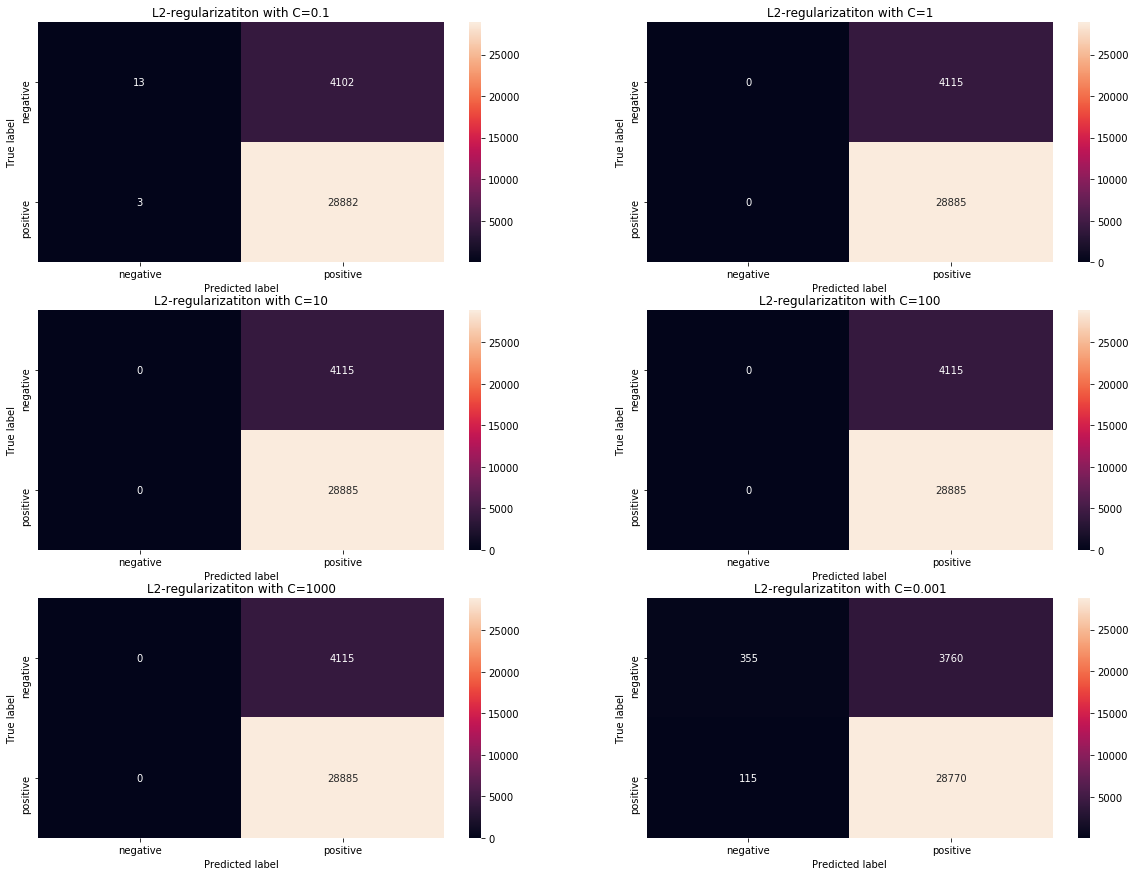

In [0]:
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

# L1-regularization with Bag of words unigrams

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.01,penalty='l1',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.10,penalty='l1',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='l1',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.5,penalty='l1',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='l1',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l1',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.881  | 0.998  |   0.88   |  0.936   |    49    |       0.163       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    16    |       0.053       | 0.01  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    0     |        0.0        |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    0     |        0.0        |  0.5  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

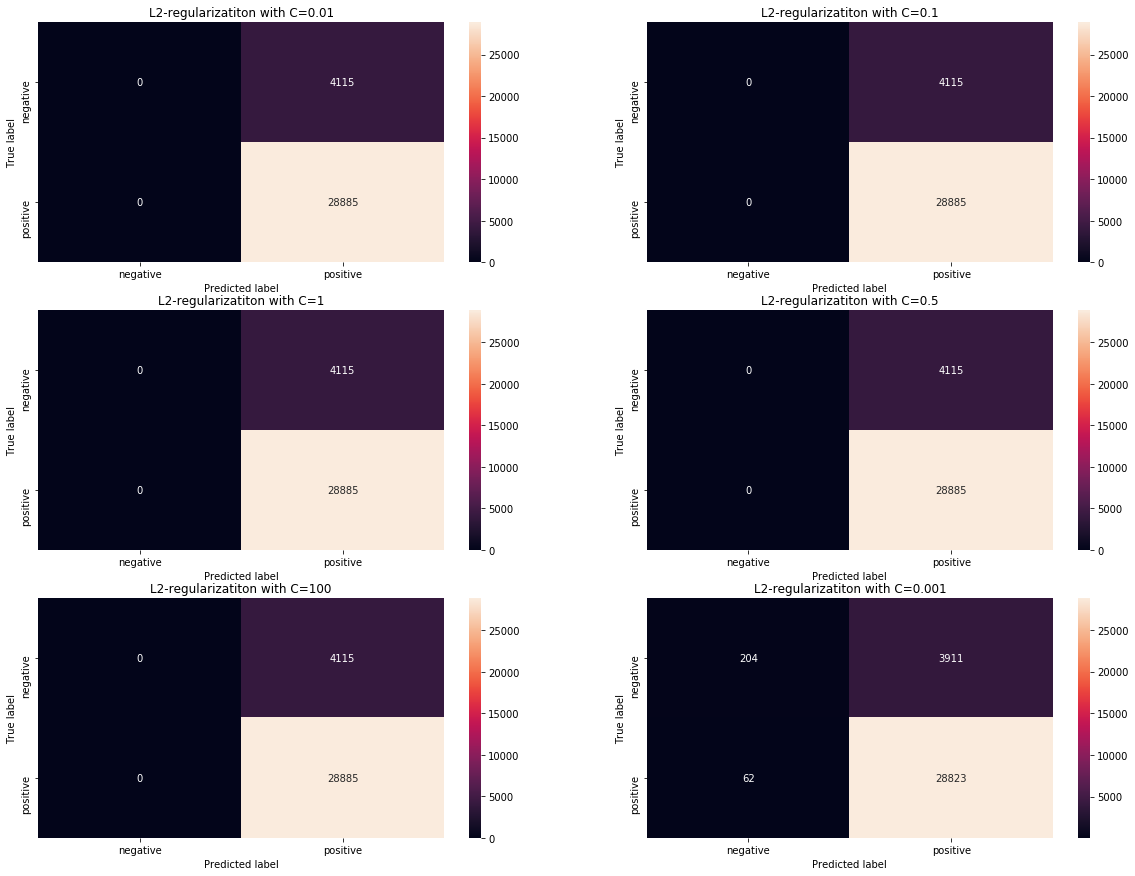

In [0]:
#!pip install BeautifulTable
C_values=[0.01,0.1,1,0.5,100,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

# observations

1. As the C value increasing error also incereasing
2. As the C value increasing the sparsity also increasing in the weight vector

# Elastic net with Word2vec

In [0]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',alpha=0.1,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_1=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_2=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=10,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_3=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=100,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_4=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=1000,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_5=svm.fit(train_data,df_train_y)
svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='elasticnet',n_jobs=-1,tol=0.001)
svm_6=svm.fit(train_data,df_train_y)

In [0]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(svm_1.predict(test_data))
outputs.append(svm_2.predict(test_data))
outputs.append(svm_3.predict(test_data))
outputs.append(svm_4.predict(test_data))
outputs.append(svm_5.predict(test_data))
outputs.append(svm_6.predict(test_data))
cms=[]
print(len(op))
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

33000


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.911  | 0.969  |   0.89   |  0.939   |   128    |       0.427       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    9     |       0.03        |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    0     |        0.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875   |  0.934   |    0     |        0.0        |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.875  |  1.0   |  0.875  

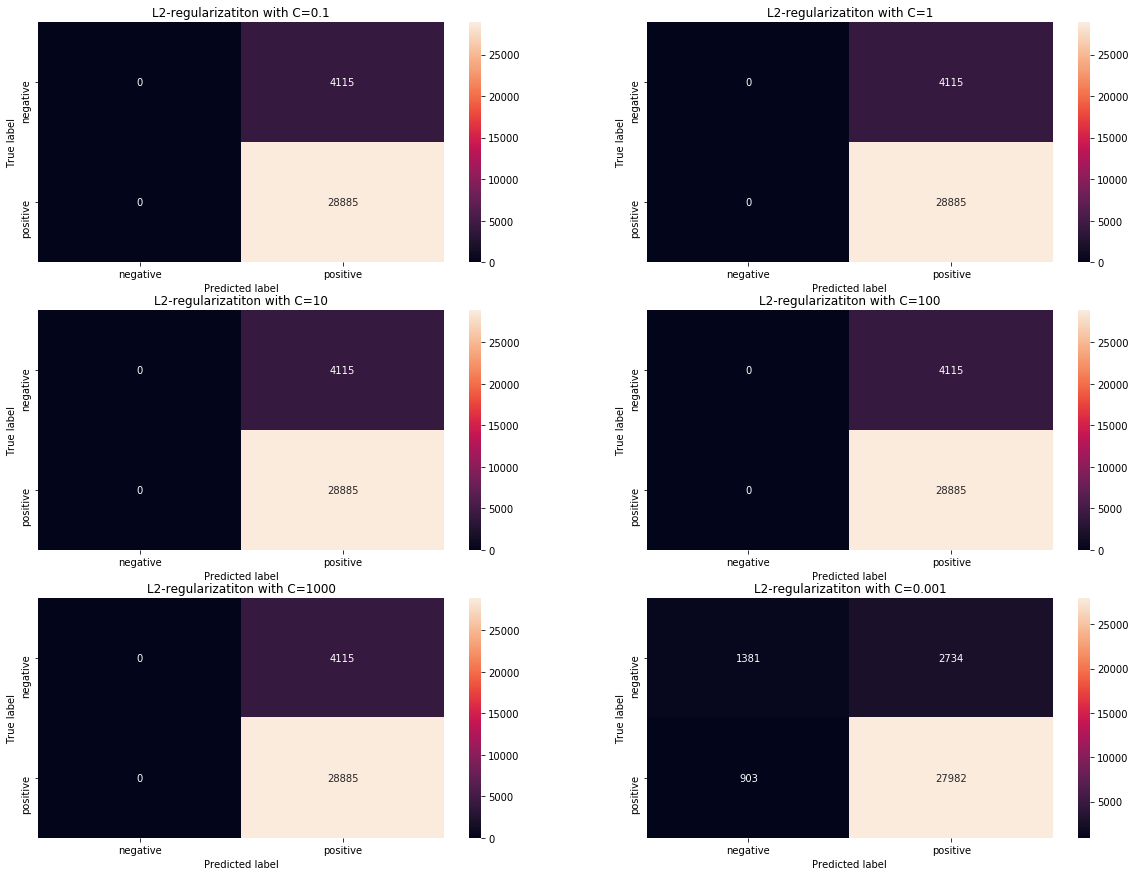

In [0]:
#!pip install BeautifulTable
C_values=[0.1,1,10,100,1000,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,3,2)

# Among all the model, both tf-idf unigrams and bigrams are getting cross validation accuracy around 95% so I'm going to compare this results with the SVC rbf kernel

# tf_idf - Unigrams

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
def grid_search(BOW1_train_std,df_train_y,filename):
    parameters = {'gamma': [0.001, 0.01, 1, 10, 100, 1000],'C':[0.001, 0.01, 1, 10, 100, 1000]}
    svm=SVC(tol=0.01,kernel='rbf',verbose=10,cache_size=1024)
    cv=GridSearchCV(svm,parameters,cv=2,scoring='f1',n_jobs=-1)
    best_model=cv.fit(BOW1_train_std,df_train_y)
    x=pd.DataFrame(best_model.cv_results_)
    x.to_csv(filename)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
def random_search(BOW1_train_std,df_train_y,filename):
    param_distributions={'gamma':np.logspace(-1,4,50),'C':np.logspace(-1,4,50)}
    svm=SVC(tol=0.01,kernel='rbf',verbose=10,cache_size=1024)
    cv1=RandomizedSearchCV(svm,param_distributions,cv=2,scoring='f1',n_jobs=-1)
    best_model1=cv1.fit(BOW1_train_std,df_train_y)
    x=pd.DataFrame(best_model1.cv_results_)
    x.to_csv(filename)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow_unigrams=TfidfVectorizer(stop_words='english')
tfidf1_train=bow_unigrams.fit(df_train_x)
tfidf1_train=bow_unigrams.transform(df_train_x)
tfidf1_test=bow_unigrams.transform(df_test_x)
print("The train data shape is ",tfidf1_train.shape,"and test data shape is ",tfidf1_test.shape)

The train data shape is  (67000, 90770) and test data shape is  (33000, 90770)


In [0]:
import ast
from IPython.display import display, HTML
def read_table_data(filename):
    x=pd.read_csv(filename)
    gamma=[]
    C=[]
    cv_score=[]
    for x1 in x[['params','mean_test_score']].values:
        a=ast.literal_eval(x1[0])
        cv_score.append(x1[1])
        gamma.append(a['gamma'])
        C.append(a['C'])
    results=pd.DataFrame({'gamma':gamma,'C':C,'cv_score':cv_score})
    zz=results.sort_values(by=['cv_score','C'],ascending=False)
    display(zz)

In [0]:
train_data,test_data=data_standardization(tfidf1_train,tfidf1_test)

(67000, 90770) (33000, 90770)


In [0]:
grid_search(train_data[:30000],df_train_y[:30000],'kernel_rbf.csv')

In [0]:
random_search(train_data[:30000],df_train_y[:30000],'kernel_rbf_randomized.csv')

In [0]:
print("*********** Results of Grid search ***********")
read_table_data('kernel_rbf.csv')
print("*********** Results of Random search ***********")
read_table_data('kernel_rbf_randomized.csv')

*********** Results of Grid search ***********


,gamma,C,cv_score
30,0.001,1000.000,0.945663
24,0.001,100.000,0.945663
18,0.001,10.000,0.945663
31,0.010,1000.000,0.945630
32,1.000,1000.000,0.945630
33,10.000,1000.000,0.945630
34,100.000,1000.000,0.945630
35,1000.000,1000.000,0.945630
25,0.010,100.000,0.945630
26,1.000,100.000,0.945630


*********** Results of Random search ***********


,gamma,C,cv_score
1,0.202359,7906.043211,0.94563
5,232.995181,3906.939937,0.94563
0,0.409492,596.362332,0.94563
8,44.984327,184.206997,0.94563
6,1.048113,91.029818,0.94563
2,5.428675,2.120951,0.94563
3,372.759372,1.325711,0.94563
9,10000.000000,0.828643,0.94563
7,0.255955,0.323746,0.94563
4,10.985411,0.126486,0.94563


**In the SVC we are getting cross validation accuracy around 94.5 for gamma= 0.001 and C=10000 so lets evalaute the model performance on test data with these parameters. Even though all combinations giving around same acuracy but using high values of  C and gamma will results overfitting so choosing low values of C and gamma would be better. ** 

High C value : **If we chhose high C values then decision surface changes as the dataset changes which would results in high variance of the model**

High gamma: **If we choose high gamma values then in the dataset we will have more islands around the data points.**

In [0]:
from sklearn.svm import SVC
svm1=SVC(gamma=0.010,C=0.10,kernel='rbf')
svm2=SVC(gamma=0.001,C=1000,kernel='rbf')

In [0]:
model1=svm1.fit(train_data[:30000],df_train_y[:30000])
model2=svm2.fit(train_data[:30000],df_train_y[:30000])

In [0]:
op=model1.predict(test_data)
op1=model2.predict(test_data)

In [0]:
dfs=[]
c=[0.1,1000]
gamma=[0.01,0.001]
sv=[model1.n_support_,model2.n_support_]
cm=confusion_matrix(df_test_y,op)
dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))
cm1=confusion_matrix(df_test_y,op1)
dfs.append(pd.DataFrame(cm1,index=['negative','positive'],columns=['negative','positive']))
#print(cm)
#print("****")
#print(cm1)

In [0]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,confusion_matrix
pre_scores=[]
re_scores=[]
f1_scores=[]
accuracy=[]
pre_scores.append(precision_score(df_test_y,op))
pre_scores.append(precision_score(df_test_y,op1))
re_scores.append(recall_score(df_test_y,op))
re_scores.append(recall_score(df_test_y,op1))
f1_scores.append(f1_score(df_test_y,op))
f1_scores.append(f1_score(df_test_y,op1))
accuracy.append(accuracy_score(df_test_y,op))
accuracy.append(accuracy_score(df_test_y,op1))

#print(pre_scores)
#print(re_scores)
#print(f1_scores)
#print(accuracy)


+------------+--------+----------+----------+-------+------+-------------------+
| precision  | recall | accuracy | f1-score | gamma |  C   |  support vectors  |
+------------+--------+----------+----------+-------+------+-------------------+
|   0.875    |  1.0   |  0.875   |  0.934   | 0.01  | 0.1  |   [ 3094 26706]   |
+------------+--------+----------+----------+-------+------+-------------------+
|   0.875    |  1.0   |  0.875   |  0.933   | 0.001 | 1000 |   [ 3085 26370]   |
+------------+--------+----------+----------+-------+------+-------------------+


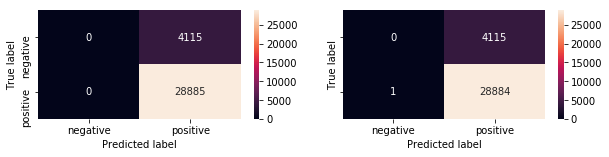

In [0]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,2),sharey=True)
i=0
sb.heatmap(dfs[0], annot=True, fmt='g',ax=ax1)
#col.title.set_text('L2-regularizatiton with C='+str(C_values[i]))
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')
i+=1
sb.heatmap(dfs[1], annot=True, fmt='g',ax=ax2)
#col.title.set_text('L2-regularizatiton with C='+str(C_values[i]))
ax2.set_xlabel('Predicted label')
ax2.set_ylabel('True label')
#print(dfs)
from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"precision",pre_scores)
table.insert_column(1,"recall",re_scores)
table.insert_column(2,"accuracy",accuracy)
table.insert_column(3,"f1-score",f1_scores)
#table.insert_column(4,"Non-zero",non_zero_ws)
#table.insert_column(5,"sparsity(Non-zero weights)",sparsity)
table.insert_column(6,"gamma",gamma)
table.insert_column(7,"C",c)
table.insert_column(8,"support vectors",sv)
sorted_table=table.sort('C')
print(table) 

**1.From the above table we can see that the recall score is 100% but if we observe table all the negative classes are predicted as positive which results in low precision score**

**2.we can see that no.of support vectors are high for both positive and negative class reviews.**


**3.perhaps the reason might be because of imbalnce dataset lets try to change the class_weight parameter in the svc and try **



In [0]:
a=df_train_y[:30000]
print(a)
from collections import Counter
c=Counter(a)
c

[1 1 1 ... 1 1 1]


Counter({1: 26906, 0: 3094})

In [0]:
we have 27000 positive reocrds and 3000 negative records so lets add class_weight parameter=balanced

In [0]:
svm3=SVC(gamma=0.001,C=1000,kernel='rbf',class_weight='balanced')

In [0]:
model3=svm2.fit(train_data[:30000],df_train_y[:30000])

In [0]:
op2=model3.predict(test_data)

[[    0  4115]
 [    1 28884]]


Text(24,0.5,'True label')

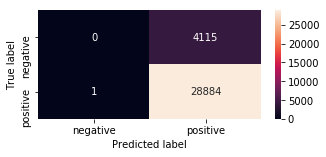

In [0]:
cm2=confusion_matrix(df_test_y,op2)
print(cm2)
dataframe=pd.DataFrame(cm2,index=['negative','positive'],columns=['negative','positive'])




fig, ax1 = plt.subplots(1,1,figsize=(5,2),sharey=True)
i=0
sb.heatmap(dataframe, annot=True, fmt='g',ax=ax1)
#col.title.set_text('L2-regularizatiton with C='+str(C_values[i]))
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')


In [0]:
model3.n_support_

array([ 3085, 26370], dtype=int32)

# Coclcusion
**After balancing weights also the performance is not improving so at the end kernel rbf's is not perfoming as good as the svm with hingle loss**

